In [1]:
import sys
sys.path.append('/home/zhujianfeng/wis/hydro-opendata/')

In [2]:
from hydro_opendata.stac.s3 import LandsatCatalog

In [3]:
lsc = LandsatCatalog()
lsc.root

'https://landsatlook.usgs.gov/stac-server'

In [4]:
lss = lsc.search(start_date='2023-09-01',bbox=[121,39,122,40])
len(lss)

24

In [5]:
lss[0]

{'type': 'Feature',
 'stac_version': '1.0.0',
 'stac_extensions': ['https://landsat.usgs.gov/stac/landsat-extension/v1.1.1/schema.json',
  'https://stac-extensions.github.io/view/v1.0.0/schema.json',
  'https://stac-extensions.github.io/projection/v1.0.0/schema.json',
  'https://stac-extensions.github.io/eo/v1.0.0/schema.json',
  'https://stac-extensions.github.io/alternate-assets/v1.1.0/schema.json',
  'https://stac-extensions.github.io/storage/v1.0.0/schema.json',
  'https://stac-extensions.github.io/accuracy/v1.0.0/schema.json',
  'https://stac-extensions.github.io/card4l/v0.1.0/optical/schema.json',
  'https://stac-extensions.github.io/classification/v1.0.0/schema.json'],
 'id': 'LC09_L2SP_120033_20230916_20230918_02_T1_ST',
 'description': 'Landsat Collection 2 Level-2 Surface Temperature Product Product',
 'bbox': [119.5770180333027,
  37.84154130550078,
  122.2030410561868,
  39.95176855105166],
 'geometry': {'type': 'Polygon',
  'coordinates': [[[120.08093332595611, 39.95176855

In [6]:
hrefs = lsc.get_hrefs(['LC09_L2SP_119033_20230909_20230911_02_T1_ST','LC09_L2SP_119033_20230909_20230911_02_T1_SR'])
hrefs

[['https://landsatlook.usgs.gov/data/collection02/level-2/standard/oli-tirs/2023/119/033/LC09_L2SP_119033_20230909_20230911_02_T1/LC09_L2SP_119033_20230909_20230911_02_T1_ST_B10.TIF',
  'https://landsatlook.usgs.gov/data/collection02/level-2/standard/oli-tirs/2023/119/033/LC09_L2SP_119033_20230909_20230911_02_T1/LC09_L2SP_119033_20230909_20230911_02_T1_ST_TRAD.TIF',
  'https://landsatlook.usgs.gov/data/collection02/level-2/standard/oli-tirs/2023/119/033/LC09_L2SP_119033_20230909_20230911_02_T1/LC09_L2SP_119033_20230909_20230911_02_T1_ST_URAD.TIF',
  'https://landsatlook.usgs.gov/data/collection02/level-2/standard/oli-tirs/2023/119/033/LC09_L2SP_119033_20230909_20230911_02_T1/LC09_L2SP_119033_20230909_20230911_02_T1_ST_DRAD.TIF',
  'https://landsatlook.usgs.gov/data/collection02/level-2/standard/oli-tirs/2023/119/033/LC09_L2SP_119033_20230909_20230911_02_T1/LC09_L2SP_119033_20230909_20230911_02_T1_ST_ATRAN.TIF',
  'https://landsatlook.usgs.gov/data/collection02/level-2/standard/oli-tirs

In [14]:
ldata = [(int(l['properties']['datetime'][0:4]), l['properties']['platform']) for l in lss]
len(ldata)

6896

In [15]:
import numpy as np
import pandas as pd

In [16]:
ld = np.array(ldata)
ld

array([['2023', 'LANDSAT_9'],
       ['2023', 'LANDSAT_9'],
       ['2023', 'LANDSAT_9'],
       ...,
       ['2010', 'LANDSAT_7'],
       ['2010', 'LANDSAT_7'],
       ['2010', 'LANDSAT_7']], dtype='<U21')

In [17]:
ldf = pd.DataFrame(ldata, columns=['year', 'platform'])
ldf

,year,platform
0,2023,LANDSAT_9
1,2023,LANDSAT_9
2,2023,LANDSAT_9
3,2023,LANDSAT_9
4,2023,LANDSAT_9
...,...,...
6891,2010,LANDSAT_7
6892,2010,LANDSAT_7
6893,2010,LANDSAT_7
6894,2010,LANDSAT_7


<AxesSubplot:xlabel='year', ylabel='platform'>

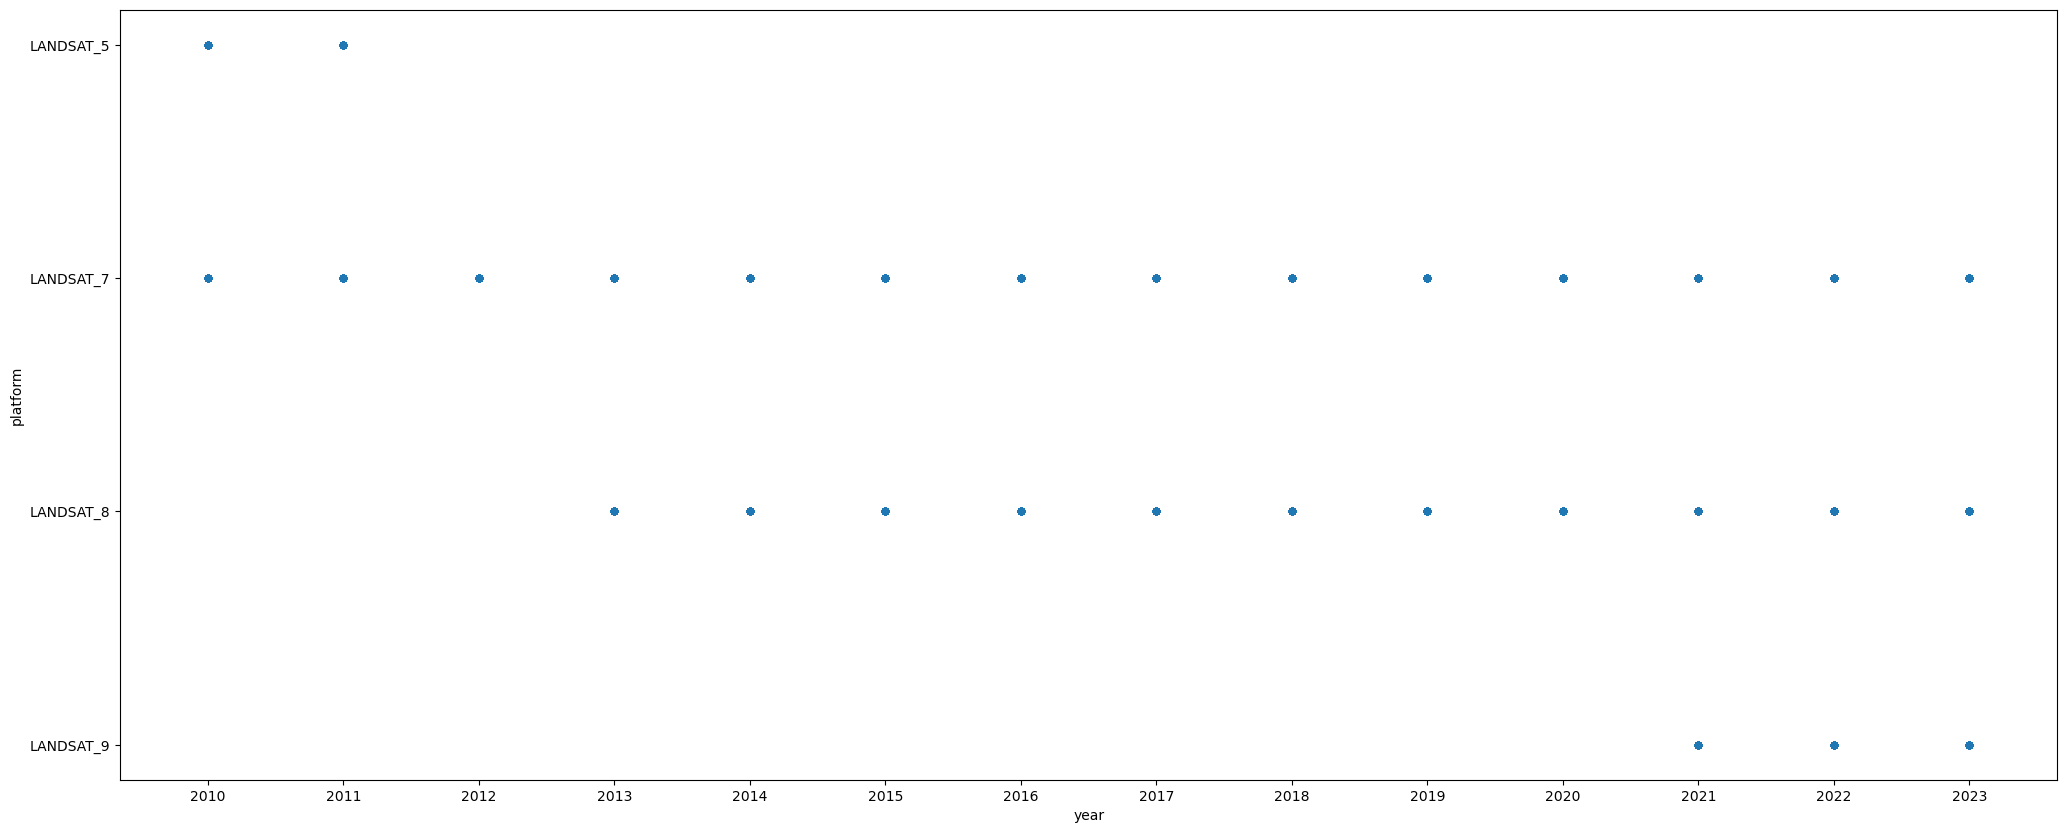

In [18]:
ldf.plot.scatter(x='year',y='platform',xticks=range(2010,2024),figsize=(25,10))

In [20]:
ldata = [(int(l['properties']['datetime'][0:4]), l['properties']['platform']) for l in lss]
ldf = pd.DataFrame(ldata, columns=['year', 'platform'])
ldf

,year,platform
0,2023,LANDSAT_9
1,2023,LANDSAT_9
2,2023,LANDSAT_9
3,2023,LANDSAT_9
4,2023,LANDSAT_9
...,...,...
6891,2010,LANDSAT_7
6892,2010,LANDSAT_7
6893,2010,LANDSAT_7
6894,2010,LANDSAT_7


In [21]:
lc = ldf.groupby(['platform','year']).size().reset_index()
lc.columns = ['platform','year','count']
lc

,platform,year,count
0,LANDSAT_5,2010,77
1,LANDSAT_5,2011,181
2,LANDSAT_7,2010,78
3,LANDSAT_7,2011,226
4,LANDSAT_7,2012,229
5,LANDSAT_7,2013,203
6,LANDSAT_7,2014,278
7,LANDSAT_7,2015,274
8,LANDSAT_7,2016,262
9,LANDSAT_7,2017,271


In [22]:
import matplotlib.pyplot as plt

In [23]:
lc[lc['platform']=='LANDSAT_1'].drop(columns=['platform'])

,year,count


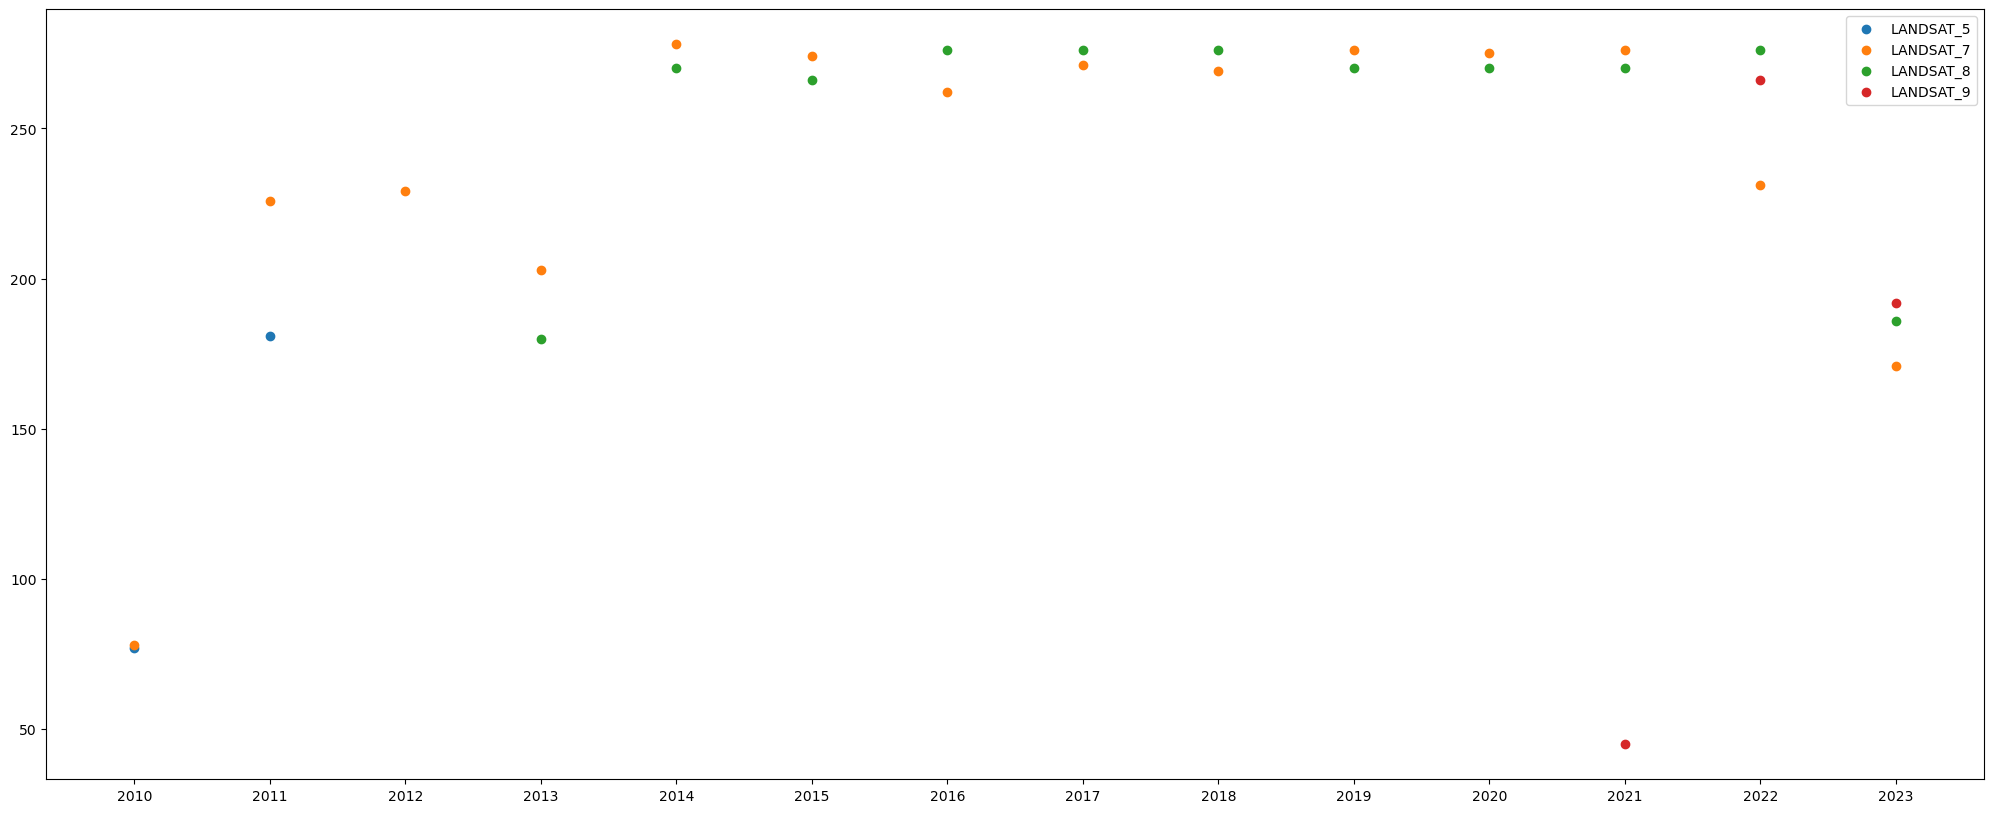

In [25]:
plt.figure(figsize=(25,10))
plt.xticks(range(2010,2024))
for ls in sorted(list(set(lc.platform))):
    plt.scatter(lc[lc['platform']==ls]['year'],lc[lc['platform']==ls]['count'],label=ls)
plt.legend()